In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import re
import nltk
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [17]:
df=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [18]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
df.shape

(7613, 5)

In [20]:
df.drop(columns=['id', 'keyword','location'], axis=1, inplace=True)

In [21]:
df.shape

(7613, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [23]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [24]:
df.duplicated().sum()

92

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
df['target'].value_counts()

target
0    4315
1    3206
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

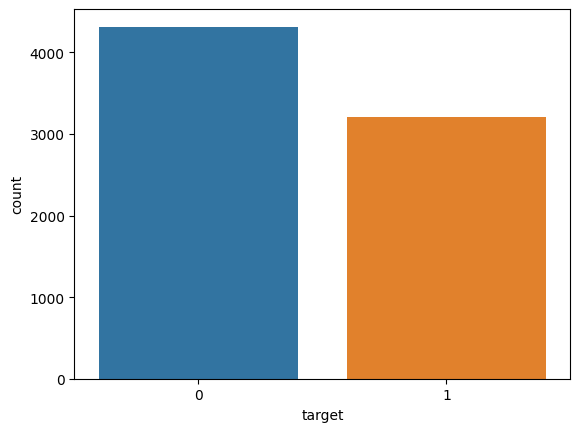

In [28]:
sn.countplot(x=df['target'])

### Word Cloud

In [29]:
disaster=''.join(df[df['target']==1]['text'])
normal=''.join(df[df['target']==0]['text'])

### a) For Disaster Tweets

(-0.5, 799.5, 399.5, -0.5)

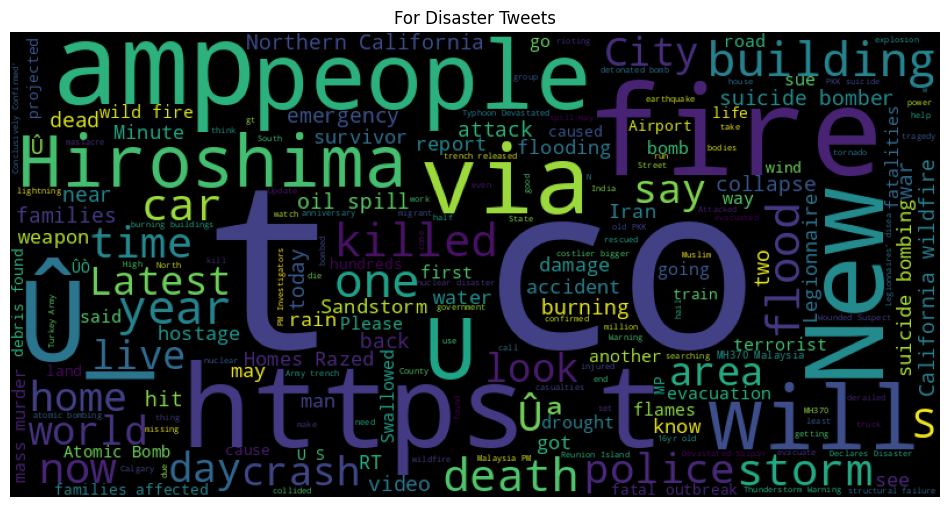

In [30]:
plt.figure(figsize=(12,8))

disaster_show=WordCloud(width=800, height=400, background_color='black').generate(disaster)

plt.imshow(disaster_show)
plt.title('For Disaster Tweets')
plt.axis('off')

### b) For Normal Tweets

Text(0.5, 1.0, 'For Normal Tweets')

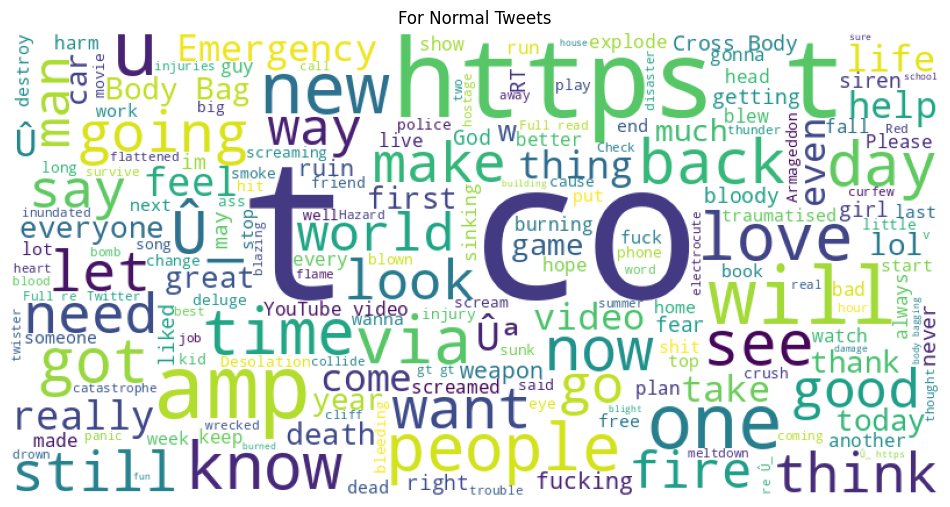

In [31]:
plt.figure(figsize=(12,8))
normal_show=WordCloud(width=800, height=400, background_color='white').generate(normal)

plt.imshow(normal_show)
plt.axis('off')
plt.title('For Normal Tweets')

## Text Preprocessing

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+', '', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    
    return text

#### Apply this to original text column

In [34]:
df['text']=df['text'].apply(preprocess_text)

In [35]:
df['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13 000 people receive wildfires evacuation ord...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7604    worldnews fallen powerlines link tram update f...
7605    flip side walmart bomb everyone evacuate stay ...
7606    suicide bomber kills 15 saudi security site mo...
7608    two giant cranes holding bridge collapse nearb...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7521, dtype: object

### As you can see our dataset is cleaned and ready.

## Train Test Split

In [36]:
X=df['text']
Y=df['target']

In [37]:
print(X)

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13 000 people receive wildfires evacuation ord...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7604    worldnews fallen powerlines link tram update f...
7605    flip side walmart bomb everyone evacuate stay ...
7606    suicide bomber kills 15 saudi security site mo...
7608    two giant cranes holding bridge collapse nearb...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7521, dtype: object


In [38]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
7604    1
7605    1
7606    1
7608    1
7612    1
Name: target, Length: 7521, dtype: int64


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(7521,) (6016,) (1505,)


## Text Vectorization

In [41]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [42]:
X_train

<6016x14679 sparse matrix of type '<class 'numpy.float64'>'
	with 54585 stored elements in Compressed Sparse Row format>

## Model Training

### 1) Logistic Regression

In [43]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [44]:
print('Training Accuracy: ',lr.score(X_train,Y_train))
print('Testing Accuracy: ',lr.score(X_test,Y_test))

Training Accuracy:  0.887466755319149
Testing Accuracy:  0.7873754152823921


### 2. Naive Bayes

In [45]:
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [46]:
print('Training Accuracy: ',nb.score(X_train,Y_train))
print('Testing Accuracy: ',nb.score(X_test,Y_test))

Training Accuracy:  0.9027593085106383
Testing Accuracy:  0.7847176079734219


### 3. XGboost classifier

In [47]:
xgb= XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
print('Training Accuracy: ',xgb.score(X_train,Y_train))
print('Testing Accuracy: ',xgb.score(X_test,Y_test))

Training Accuracy:  0.8578789893617021
Testing Accuracy:  0.7514950166112957


### 4. Light Gradient Boosting Classifier

In [49]:
gbm=LGBMClassifier()
gbm.fit(X_train,Y_train)

LGBMClassifier()

In [50]:
print('Training Accuracy: ',gbm.score(X_train,Y_train))
print('Testing Accuracy: ',gbm.score(X_test,Y_test))

Training Accuracy:  0.8513962765957447
Testing Accuracy:  0.7661129568106312


### 5. Support Vector Machine

In [51]:
sv=SVC()
sv.fit(X_train,Y_train)

SVC()

In [52]:
print('Training Accuracy: ',sv.score(X_train,Y_train))
print('Testing Accuracy: ',sv.score(X_test,Y_test))

Training Accuracy:  0.9702460106382979
Testing Accuracy:  0.7900332225913621


### Evaluate the model

In [53]:
report =classification_report(Y_test, sv.predict(X_test))

print(report)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       817
           1       0.88      0.63      0.73       688

    accuracy                           0.79      1505
   macro avg       0.81      0.78      0.78      1505
weighted avg       0.81      0.79      0.78      1505



## Kaggle Submission

In [58]:
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [59]:
X_submission = test['text']


X_submission_preprocess=test['text'].apply(preprocess_text)

X_submission_vectorized = tfidf.transform(X_submission_preprocess)

# Make predictions on the test set
y_submission_pred = sv.predict(X_submission_vectorized)

**Create a DataFrame for submission**

In [60]:
submission_df = pd.DataFrame({
    'id': test['id'],
    'target': y_submission_pred
})

# Save the submission file
submission_path = '/kaggle/working/submission.csv'
submission_df.to_csv(submission_path, index=False)

**Display the submission DataFrame**

In [61]:
submission_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
